In [1]:
%run ../_preamble.ipynb
from _work.src.data import medium_dataloader as dataloader
from _work.src.models import AutoEncoder
from _work.src.modules import train_model, test_model, plot_metrics, plot_parameters, plot_tensor, plot_grid
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch

import matplotlib.patches as patches
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

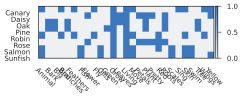

In [2]:
plot_tensor(dataloader.dataset.df);

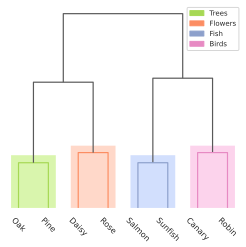

In [2]:
def plot_hierarchy():
    pal = sns.color_palette("Set2")

    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(dataloader.dataset.df)

    def plot_dendrogram(model, **kwargs):
        counts = np.zeros(model.children_.shape[0])
        n_samples = len(model.labels_)

        hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
        
        for i, merge in enumerate(model.children_):
            current_count = 0
            for child_idx in merge:
                if child_idx < n_samples:
                    current_count += 1  # leaf node
                else:
                    current_count += counts[child_idx - n_samples]
            counts[i] = current_count

        linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
        return hierarchy.dendrogram(linkage_matrix, get_leaves=True, **kwargs)

    def l_color(k):
        p = pal.as_hex()
        # default = sns.color_palette("pastel").as_hex()[0]
        default = '0.35'
        return {
            14: default,

            13: default,
            12: default,

            11: p[1],
            10: p[3],
            9: p[2],
            8: p[4],
        }[k]

    with plt.style.context({
        'axes.grid': False,
        'axes.facecolor': 'white',
        # 'legend.edgecolor': '0.2',
        # "figure.figsize": (4.2, 3.54),
        "figure.figsize": (3.54, 3.54),
    }):
        res = plot_dendrogram(model, link_color_func=l_color);
        leaves = res['leaves']
        # plt.xticks([]);
        plt.yticks([]);
        ax = plt.gca()
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        plt.xticks(
            ticks=plt.xticks()[0],
            labels=[dataloader.dataset.df.index[int(x.get_text())] for x in plt.xticks()[1]],
            rotation=-45,
            fontsize=8,
        );

        patch1 = patches.Rectangle((2.5, 0), 15, 1.65, facecolor='#D9F5AD')
        ax.add_patch(patch1)

        patch2 = patches.Rectangle((25 - 2.5, 0), 15, 1.95, facecolor='#FFD8C9')
        ax.add_patch(patch2)

        patch3 = patches.Rectangle((45 - 2.5, 0), 15, 1.65, facecolor='#D2DFFD')
        ax.add_patch(patch3)

        patch4 = patches.Rectangle((65 - 2.5, 0), 15, 1.95, facecolor='#FCD3EC')
        ax.add_patch(patch4)
        
        p = pal.as_hex()
        plt.legend(handles=[
            patches.Patch(color=p[4], label="Trees"),
            patches.Patch(color=p[1], label="Flowers"),
            patches.Patch(color=p[2], label="Fish"),
            patches.Patch(color=p[3], label="Birds"),
        ])
        plt.tight_layout()

plot_hierarchy()
# plt.savefig("../plots/hierarchy_best")

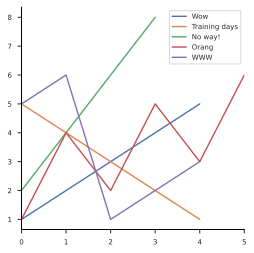

In [169]:
plt.plot([1, 2, 3, 4, 5], label="Wow")
plt.plot([x for x in reversed([1, 2, 3, 4, 5])], label="Training days")
plt.plot([2, 4, 6, 8], label="No way!")
plt.plot([1, 4, 2, 5, 3, 6], label="Orang")
plt.plot([5, 6, 1, 2, 3], label="WWW")
plt.legend()
plt.tight_layout()